<a href="https://colab.research.google.com/github/TeaWithLucas/MLBirds/blob/main/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import shutil
from sklearn.model_selection import train_test_split
import cv2
import numpy as np
import re
import seaborn as sns
import operator
from IPython import get_ipython
ipy = get_ipython()
if ipy is not None:
    ipy.run_line_magic('matplotlib', 'inline')

In [3]:
git_fldr = '/content/MLBirds/'

if os.path.exists(git_fldr):
  %cd '/content/MLBirds/'
  !git pull
else:
  !git clone https://github.com/TeaWithLucas/MLBirds.git
  %cd '/content/MLBirds/'

import data_load as data

Cloning into 'MLBirds'...
remote: Enumerating objects: 24172, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 24172 (delta 7), reused 2 (delta 1), pack-reused 24152
Receiving objects: 100% (24172/24172), 1.15 GiB | 38.56 MiB/s, done.
Resolving deltas: 100% (100/100), done.
Checking out files: 100% (23610/23610), done.
/content/MLBirds


In [4]:
print(data.bounding_boxes.head())
print(data.classes.head())
print(data.image_class_labels.head())
print(data.images.head())
print(data.train_test_split.head())

print(data.attributes.head())
print(data.certainties.head())
print(data.class_attribute_labels_continuous.head())
print(data.image_attribute_labels.head())

print(data.part_click_locs.head())
print(data.part_locs.head())
print(data.parts.head())

   image_id    x    y  width  height
0         1   60   27    325     304
1         2  139   30    153     264
2         3   14  112    388     186
3         4  112   90    255     242
4         5   70   50    134     303
   class_id              class_name
0         1  Black_footed_Albatross
1         2        Laysan_Albatross
2         3         Sooty_Albatross
3         4       Groove_billed_Ani
4         5          Crested_Auklet
   image_id  class_id
0         1         1
1         2         1
2         3         1
3         4         1
4         5         1
   image_id                                         image_name
0         1  001.Black_footed_Albatross/Black_Footed_Albatr...
1         2  001.Black_footed_Albatross/Black_Footed_Albatr...
2         3  001.Black_footed_Albatross/Black_Footed_Albatr...
3         4  001.Black_footed_Albatross/Black_Footed_Albatr...
4         5  001.Black_footed_Albatross/Black_Footed_Albatr...
   image_id  is_training_image
0         1          

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


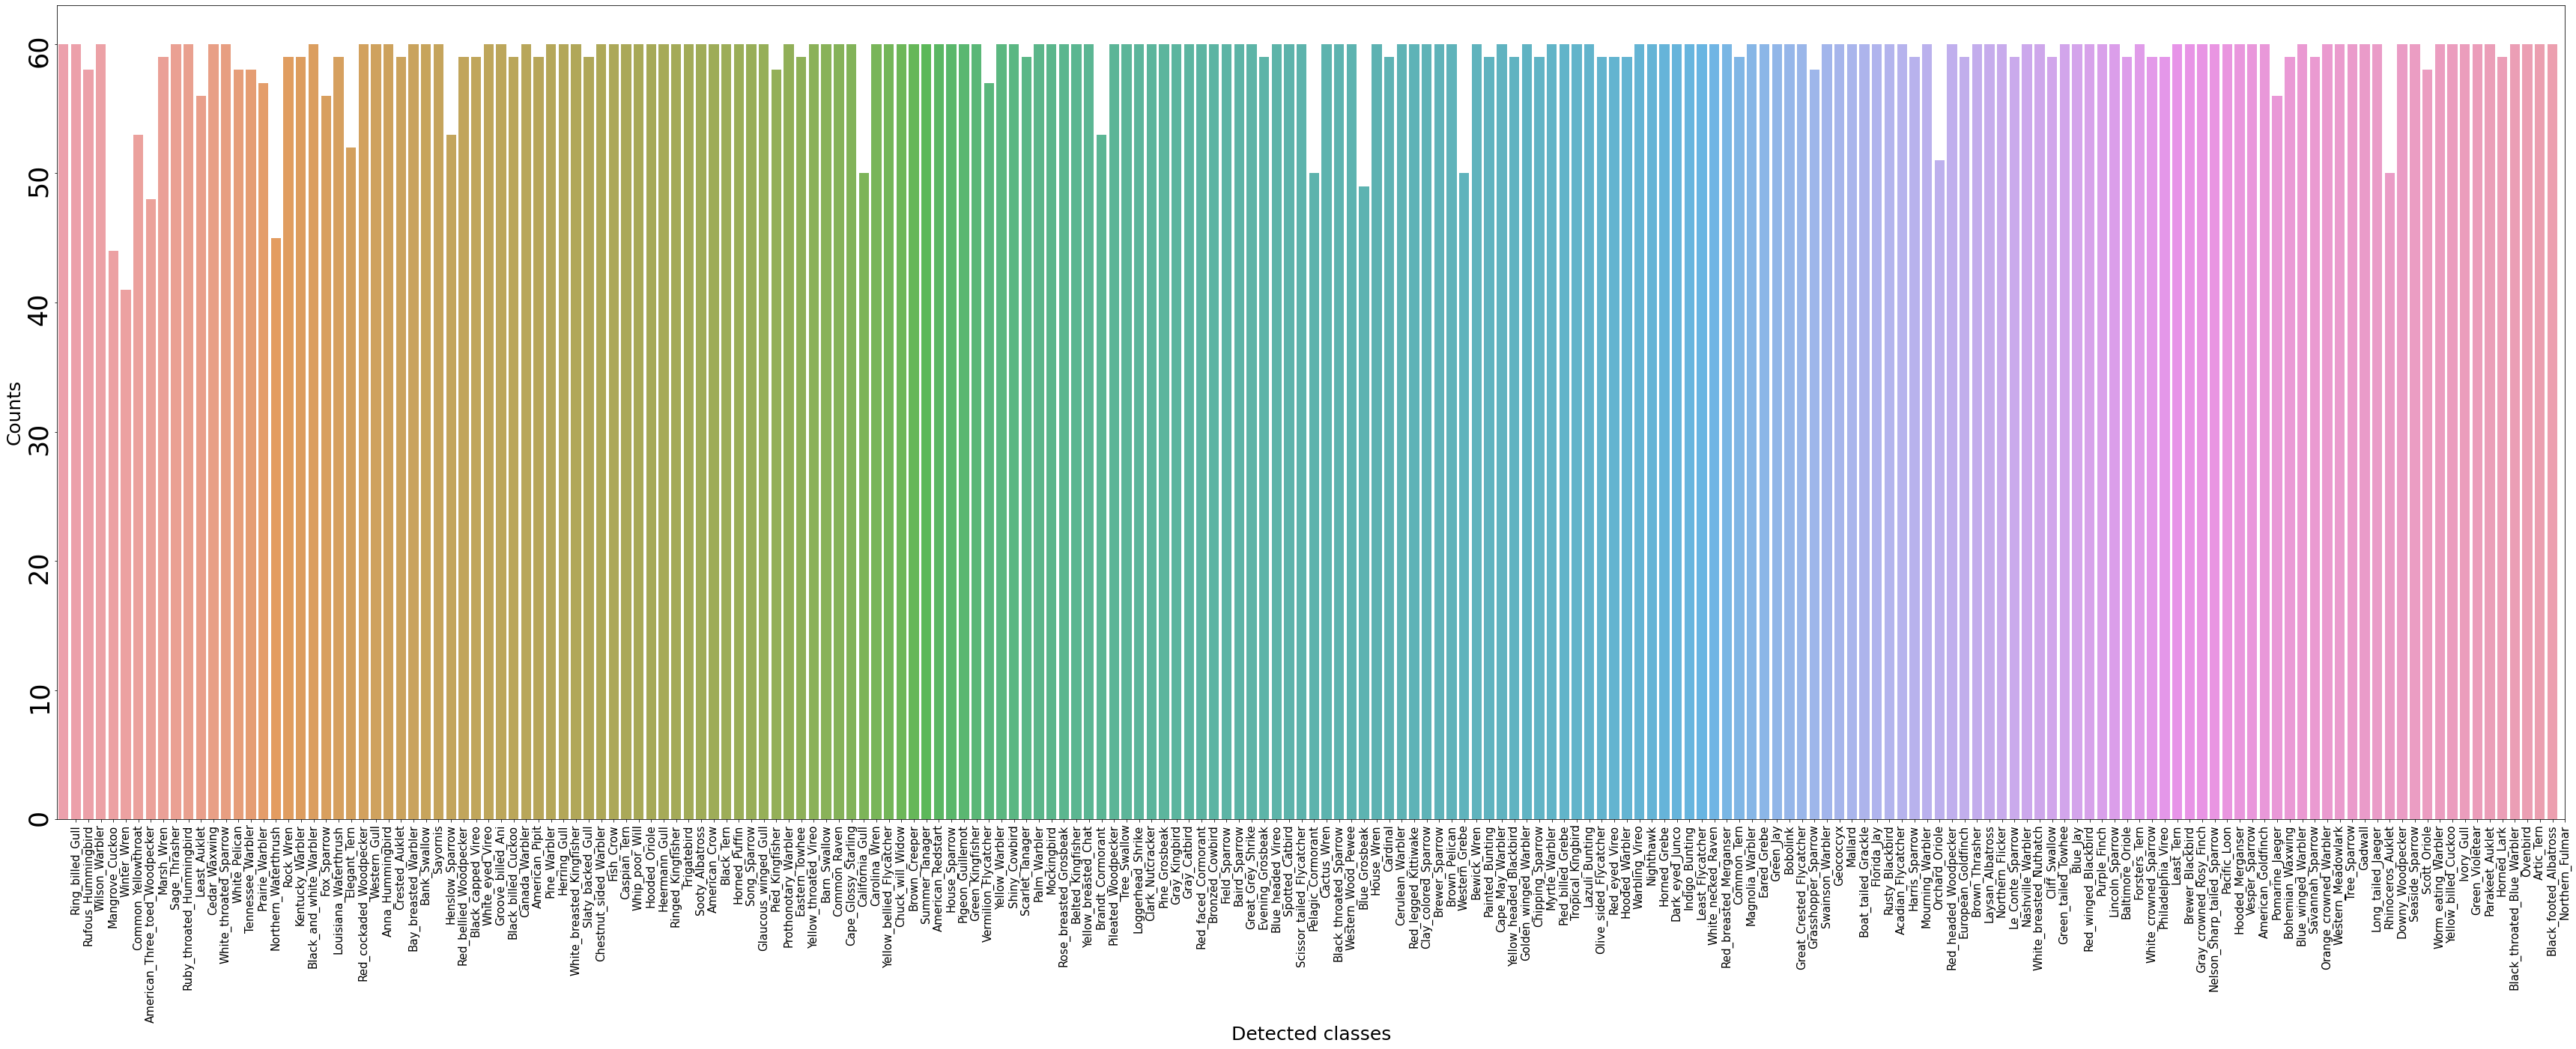

In [5]:
detected_counts = data.image_class_labels.class_id.value_counts()
plt.figure(figsize = (60,20))
sns.barplot(detected_counts.index, detected_counts.values, alpha = 0.9)
plt.xticks(detected_counts.index,data.classes['class_name'], rotation = 'vertical',fontsize=15)
plt.yticks(rotation = 'vertical',fontsize=35)
plt.xlabel('Detected classes', fontsize =25)
plt.ylabel('Counts', fontsize = 25)
plt.show()

In [6]:
dict_word_frequency={}

for word in data.image_class_labels['class_id']:
  if word not in dict_word_frequency: dict_word_frequency[word]=1
  else: dict_word_frequency[word]+=1

In [7]:
sorted_list = sorted(dict_word_frequency.items(), key=operator.itemgetter(1), reverse=True)
i=0
j=0
for word,frequency in sorted_list:
  i+=1
  print (str(i)+". "+str(word)+" - "+str(frequency))
  j=j+frequency

1. 1 - 60
2. 2 - 60
3. 4 - 60
4. 10 - 60
5. 11 - 60
6. 13 - 60
7. 14 - 60
8. 21 - 60
9. 25 - 60
10. 26 - 60
11. 27 - 60
12. 29 - 60
13. 30 - 60
14. 31 - 60
15. 35 - 60
16. 36 - 60
17. 38 - 60
18. 40 - 60
19. 41 - 60
20. 42 - 60
21. 44 - 60
22. 45 - 60
23. 46 - 60
24. 47 - 60
25. 48 - 60
26. 49 - 60
27. 50 - 60
28. 51 - 60
29. 52 - 60
30. 53 - 60
31. 54 - 60
32. 55 - 60
33. 56 - 60
34. 57 - 60
35. 59 - 60
36. 61 - 60
37. 62 - 60
38. 63 - 60
39. 64 - 60
40. 66 - 60
41. 67 - 60
42. 68 - 60
43. 69 - 60
44. 70 - 60
45. 71 - 60
46. 72 - 60
47. 73 - 60
48. 74 - 60
49. 76 - 60
50. 77 - 60
51. 79 - 60
52. 80 - 60
53. 81 - 60
54. 82 - 60
55. 83 - 60
56. 85 - 60
57. 86 - 60
58. 87 - 60
59. 88 - 60
60. 89 - 60
61. 90 - 60
62. 91 - 60
63. 92 - 60
64. 93 - 60
65. 94 - 60
66. 95 - 60
67. 96 - 60
68. 98 - 60
69. 99 - 60
70. 100 - 60
71. 102 - 60
72. 103 - 60
73. 104 - 60
74. 106 - 60
75. 108 - 60
76. 109 - 60
77. 110 - 60
78. 111 - 60
79. 112 - 60
80. 114 - 60
81. 116 - 60
82. 118 - 60
83. 120 - 60
84

In [8]:
print ("the total number of images = "+str(j))
print ("Total number of classes = "+str(i))

the total number of images = 11788
Total number of classes = 200


In [9]:
print("average number of images for a class = "+str(j/i))

average number of images for a class = 58.94


In [10]:
train = []
test= []
for i in range(0,11788):
  if(data.train_test_split['is_training_image'][i]==1):
    train.append(data.image_class_labels['class_id'][i])
  else:
    test.append(data.image_class_labels['class_id'][i])

print("the dataset is divided into "+str(len(train)*100/(len(train)+len(test)))+"% train set and "+str(len(test)*100/(len(train)+len(test)))+"% test set")
print("number of images in trainset = "+str(len(train)))
print("number of images in testset = "+str(len(test)))

the dataset is divided into 50.848320325755004% train set and 49.151679674244996% test set
number of images in trainset = 5994
number of images in testset = 5794


In [11]:
x_temp_list = []
y_temp_list = []
for i in range(0, 11788):
    y_temp_list.append(data.image_class_labels['class_id'][i])
    x_temp_list.append(i)

x_train, x_test, y_train, y_test = train_test_split(x_temp_list,y_temp_list, train_size = 0.8, random_state = 1)
x_test, x_dev, y_test, y_dev = train_test_split(x_test, y_test, train_size = 0.5, random_state = 1)

print("Number of images in our new train set: " + str(len(x_train)))
print("Number of images in our new test set: " + str(len(x_test)))
print("Number of images in our new dev set: " + str(len(x_dev)))

Number of images in our new train set: 9430
Number of images in our new test set: 1179
Number of images in our new dev set: 1179


In [12]:
dict_train={}
dict_test={}

for word in train:
  if word not in dict_train: dict_train[word]=1
  else: dict_train[word]+=1
for word in test:
  if word not in dict_test: dict_test[word]=1
  else: dict_test[word]+=1


In [13]:
sorted_list = sorted(dict_train.items(), key=operator.itemgetter(1), reverse=True) #no.of words
i=0
j=0
for word,frequency in sorted_list:
  i+=1
  print (str(i)+". "+str(word)+" - "+str(frequency))

1. 1 - 30
2. 2 - 30
3. 3 - 30
4. 4 - 30
5. 5 - 30
6. 6 - 30
7. 7 - 30
8. 8 - 30
9. 9 - 30
10. 10 - 30
11. 11 - 30
12. 12 - 30
13. 13 - 30
14. 14 - 30
15. 15 - 30
16. 16 - 30
17. 17 - 30
18. 18 - 30
19. 19 - 30
20. 20 - 30
21. 21 - 30
22. 22 - 30
23. 23 - 30
24. 24 - 30
25. 25 - 30
26. 26 - 30
27. 27 - 30
28. 28 - 30
29. 29 - 30
30. 30 - 30
31. 31 - 30
32. 32 - 30
33. 33 - 30
34. 34 - 30
35. 35 - 30
36. 36 - 30
37. 37 - 30
38. 38 - 30
39. 39 - 30
40. 40 - 30
41. 41 - 30
42. 42 - 30
43. 43 - 30
44. 44 - 30
45. 45 - 30
46. 46 - 30
47. 47 - 30
48. 48 - 30
49. 49 - 30
50. 50 - 30
51. 51 - 30
52. 52 - 30
53. 53 - 30
54. 54 - 30
55. 55 - 30
56. 56 - 30
57. 57 - 30
58. 58 - 30
59. 59 - 30
60. 60 - 30
61. 61 - 30
62. 62 - 30
63. 63 - 30
64. 64 - 30
65. 65 - 30
66. 66 - 30
67. 67 - 30
68. 68 - 30
69. 69 - 30
70. 70 - 30
71. 71 - 30
72. 72 - 30
73. 73 - 30
74. 74 - 30
75. 75 - 30
76. 76 - 30
77. 77 - 30
78. 78 - 30
79. 79 - 30
80. 80 - 30
81. 81 - 30
82. 82 - 30
83. 83 - 30
84. 84 - 30
85. 85 - 3

In [14]:
sorted_list = sorted(dict_test.items(), key=operator.itemgetter(1), reverse=True) #no.of words
i=0
for word,frequency in sorted_list:
  i+=1
  print (str(i)+". "+str(word)+" - "+str(frequency))

1. 1 - 30
2. 2 - 30
3. 4 - 30
4. 10 - 30
5. 11 - 30
6. 13 - 30
7. 14 - 30
8. 21 - 30
9. 25 - 30
10. 26 - 30
11. 27 - 30
12. 29 - 30
13. 30 - 30
14. 31 - 30
15. 35 - 30
16. 36 - 30
17. 38 - 30
18. 40 - 30
19. 41 - 30
20. 42 - 30
21. 44 - 30
22. 45 - 30
23. 46 - 30
24. 47 - 30
25. 48 - 30
26. 49 - 30
27. 50 - 30
28. 51 - 30
29. 52 - 30
30. 53 - 30
31. 54 - 30
32. 55 - 30
33. 56 - 30
34. 57 - 30
35. 59 - 30
36. 61 - 30
37. 62 - 30
38. 63 - 30
39. 64 - 30
40. 66 - 30
41. 67 - 30
42. 68 - 30
43. 69 - 30
44. 70 - 30
45. 71 - 30
46. 72 - 30
47. 73 - 30
48. 74 - 30
49. 76 - 30
50. 77 - 30
51. 79 - 30
52. 80 - 30
53. 81 - 30
54. 82 - 30
55. 83 - 30
56. 85 - 30
57. 86 - 30
58. 87 - 30
59. 88 - 30
60. 89 - 30
61. 90 - 30
62. 91 - 30
63. 92 - 30
64. 93 - 30
65. 94 - 30
66. 95 - 30
67. 96 - 30
68. 98 - 30
69. 99 - 30
70. 100 - 30
71. 102 - 30
72. 103 - 30
73. 104 - 30
74. 106 - 30
75. 107 - 30
76. 108 - 30
77. 109 - 30
78. 110 - 30
79. 111 - 30
80. 112 - 30
81. 114 - 30
82. 116 - 30
83. 118 - 30
84

Inspiration and some code taken from the following website
https://towardsdatascience.com/exploratory-data-analysis-ideas-for-image-classification-d3fc6bbfb2d2

Here is a sample of the training images in the dataset


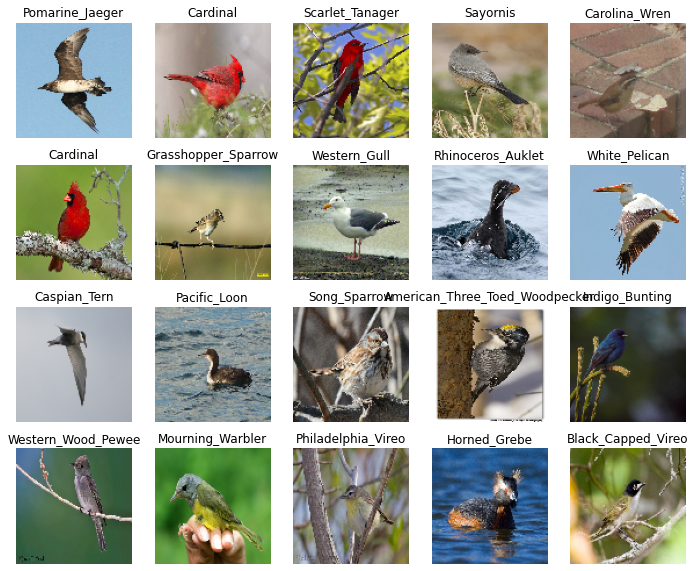

In [20]:
from tensorflow.keras.preprocessing import image
import data_load as data
import numpy as np
import random
print("Inspiration and some code taken from the following website")
print("https://towardsdatascience.com/exploratory-data-analysis-ideas-for-image-classification-d3fc6bbfb2d2")
print("")
print("Here is a sample of the training images in the dataset")

train_images = []
for i in range(len(data.images.image_id)):
    if(data.train_test_split['is_training_image'][i]==1):
        train_images.append(data.images['image_name'][i])

images = np.random.choice(train_images, 20, replace = False)

def strip_string(string_to_strip):
    return_value = ''.join([i for i in string_to_strip if not i.isdigit()])
    return_value = return_value.strip(".jpg").strip('_')
    return return_value


fig = plt.figure(figsize = (12,10))
for i in range(20):
    species = images[i].split("/")
    fp = 'images/' + images[i]
    label = strip_string(species[1])

    ax = fig.add_subplot(4, 5, i+1)
    
    # to plot without rescaling, remove target_size
    fn = image.load_img(fp, target_size = (100,100), color_mode='rgb')
    plt.imshow(fn, cmap='Greys_r')
    plt.title(label)
    plt.axis('off')
plt.show()

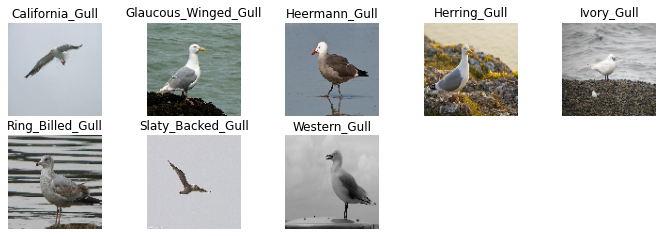

In [21]:
gulls = [i for i in data.classes.class_name if "Gull" in i]
images_to_load = []
species_image = []

for sp in gulls:    
    for bird in train_images:
        if sp in bird:
            species_image.append(bird)
            break

fig = plt.figure(figsize = (12,10))
for i in range(len(gulls)):
    species_split = species_image[i].split("/")
    fp = 'images/' + species_image[i]
    label = strip_string(species_split[1])

    ax = fig.add_subplot(5, 5, i+1)
    
    # to plot without rescaling, remove target_size
    fn = image.load_img(fp, target_size = (100,100), color_mode='rgb')
    plt.imshow(fn, cmap='Greys_r')
    plt.title(label)
    plt.axis('off')
plt.show()

The following images are the average images for a number of different species


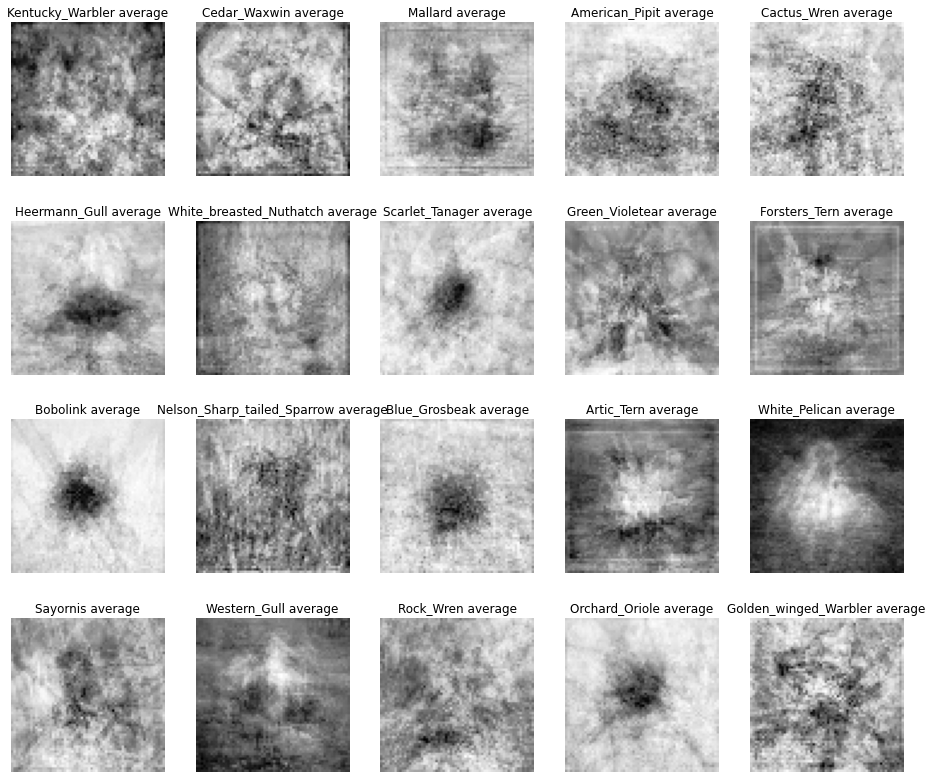

In [41]:
#turns the given images in list_of_filename into a matrix of vector representations of the images
def img2np(path, list_of_filename, size = (64, 64)):
    # iterating through each file
    for fn in list_of_filename:
        fp = path + "/" + fn
        current_image = image.load_img(fp, target_size = size, 
                                       color_mode = 'grayscale')
        # covert image to a matrix
        img_ts = image.img_to_array(current_image)
        # turn that into a vector / 1D array
        img_ts = [img_ts.ravel()]
        try:
            # concatenate different images
            full_mat = np.concatenate((full_mat, img_ts))
        except UnboundLocalError: 
            # if not assigned yet, assign one
            full_mat = img_ts
    return full_mat
    
def find_mean_img(full_mat, title, size = (64, 64)):
    # calculate the average
    mean_img = np.mean(full_mat, axis = 0)
    # reshape it back to a matrix
    mean_img = mean_img.reshape(size)
    return mean_img
print("The following images are the average images for a number of different species")
species = data.classes.class_name
images = np.random.choice(species, 20, replace = False)
images_to_load = []

#changes images to gull to get the average image for each type of gull
for sp in images: 
    species_image = []
    for bird in train_images:
        if sp in bird:
            species_image.append(bird)
        
    images_to_load.append(species_image)
    
mean_images = []
for category in images_to_load:
    sp = []
    path_list = []
    for pic in category:
        sp = pic.split("/")
        path_list.append(sp[1])
    matrix = img2np("images/" + sp[0], path_list)
    mean_images.append([find_mean_img(matrix, sp[0]), sp[0]])

fig = plt.figure(figsize = (16,14))

i = 0
for mean_img in mean_images:
    ax = fig.add_subplot(4, 5, i+1)
    plt.imshow(mean_img[0], cmap='Greys_r')
    plt.title(strip_string(mean_img[1]) + ' average')
    plt.axis('off')
    i += 1
plt.show()

    


In [38]:
# Python program to get average of a list
def Average(lst):
    return sum(lst) / len(lst)


heights = []
widths = []
channels = []
def get_dims():
  for img_name in data.images.image_name:
    fp = 'images/' + img_name
    img = cv2.imread(fp)
    h, w, c = img.shape
    heights.append(h)
    widths.append(w)
    channels.append(c)

def show_dims():
  print("min heights:", min(heights))
  print("max heights:", max(heights))
  print("average heights:",Average(heights))

  print("min widths:", min(widths))
  print("max widths:", max(widths))
  print("average widths:",Average(widths))

  print("min channels:", min(channels))
  print("max channels:", max(channels))
  print("average channels:",Average(channels))

In [39]:
get_dims()

In [40]:
show_dims()

min heights: 120
max heights: 500
average heights: 386.02994570749917
min widths: 121
max widths: 500
average widths: 467.88683406854426
min channels: 3
max channels: 3
average channels: 3.0
